In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [3]:
path_van = '../datasets_full/Vancouver/'
path_london = '../datasets_full/London/'
path_brazil = '../datasets_full/Brazil/'
van_raw = pd.read_csv(path_van.join('vancouver_employment_by_industry.csv'))  # Vancouver, Canada, 2010
industry_map = pd.read_csv(path_van.join'vancouver_employment_by_industry_legend.csv', thousands=',')  # Vancouver, Canada, 2010
london_raw = pd.read_csv(path_london.join('london_economic_activity.csv')) # London, UK, 2012
brazil_raw = pd.read_csv(path_brazil.join'brazil_unemployment.csv')  # Rio, Brazil

In [5]:
display(van_raw.head())
display(industry_map.head())
display(london_raw.head(20))
display(brazil_raw)

,year,industry_code,value
0,1987.0,0,1377700.0
1,1987.0,"11,21,22,23,31,32,33",333800.0
2,1987.0,"1100 1129, 1151 1152",31700.0
3,1987.0,1111 1119,15500.0
4,1987.0,1121 1129,14100.0


,industry_name,code
0,All Industries,0
1,Goods-Producing Sector,"11,21,22,23,31,32,33"
2,Agriculture,"1100 - 1129, 1151 - 1152"
3,Crop Production,1111 - 1119
4,Animal Production,1121 - 1129


,year,area_code,area,gender,economically_active,working_age,percent,confidence
0,Jan 2005-Dec 2005,00AA,City of London,F,2400.0,3600.0,64.4,NaN
1,Jan 2006-Dec 2006,00AA,City of London,F,NaN,NaN,NaN,NaN
2,Jan 2007-Dec 2007,00AA,City of London,F,NaN,1400.0,NaN,NaN
3,Jan 2008-Dec 2008,00AA,City of London,F,1200.0,1200.0,100.0,NaN
4,Jan 2009-Dec 2009,00AA,City of London,F,NaN,NaN,NaN,NaN
5,Jan 2010-Dec 2010,00AA,City of London,F,NaN,2700.0,NaN,NaN
6,Jan 2011-Dec 2011,00AA,City of London,F,NaN,NaN,NaN,NaN
7,Jan 2012-Dec 2012,00AA,City of London,F,NaN,NaN,NaN,NaN
8,Jan 2013-Dec 2013,00AA,City of London,F,NaN,NaN,65.8,NaN
9,Jan 2014-Dec 2014,00AA,City of London,F,NaN,NaN,NaN,NaN


,year,quarter,category,state,value
0,2012,Q1,Workforce - Employed,Rondônia,701
1,2012,Q1,Workforce - Employed,Acre,286
2,2012,Q1,Workforce - Employed,Amazonas,1392
3,2012,Q1,Workforce - Employed,Roraima,170
4,2012,Q1,Workforce - Employed,Pará,3123
...,...,...,...,...,...
2668,2020,Q1,Outside the workforce,Rio Grande do Sul,3487
2669,2020,Q1,Outside the workforce,Mato Grosso do Sul,780
2670,2020,Q1,Outside the workforce,Mato Grosso,905
2671,2020,Q1,Outside the workforce,Goiás,2014


### London

In [60]:
london_raw

,year,area_code,area,gender,economically_active,working_age,percent,confidence
0,2005,00AA,City of London,F,2400.0,3600.0,64.4,NaN
1,2006,00AA,City of London,F,NaN,NaN,NaN,NaN
2,2007,00AA,City of London,F,NaN,1400.0,NaN,NaN
3,2008,00AA,City of London,F,1200.0,1200.0,100.0,NaN
4,2009,00AA,City of London,F,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1465,2015,926,United Kingdom,M,16841300.0,20275800.0,83.1,0.2
1466,2016,926,United Kingdom,M,16920800.0,20374900.0,83.0,0.3
1467,2017,926,United Kingdom,M,17028300.0,20451000.0,83.3,0.3
1468,2018,926,United Kingdom,M,17056000.0,20513300.0,83.1,0.3


In [31]:
try:
    london_raw['year'] = np.array([s.split(' ')[2] for s in london_raw['year']]).astype('int')
except:
    pass
london = london_raw.set_index('year')
display(london.loc[london['area'] == 'Barnet',:])

,area_code,area,gender,economically_active,working_age,percent,confidence
year,,,,,,,
2005,00AC,Barnet,F,74500.0,110200.0,67.7,5.9
2006,00AC,Barnet,F,74700.0,112800.0,66.3,5.5
2007,00AC,Barnet,F,75600.0,113400.0,66.7,5.1
2008,00AC,Barnet,F,75300.0,114800.0,65.6,5.0
2009,00AC,Barnet,F,73800.0,117500.0,62.8,5.9
2010,00AC,Barnet,F,83100.0,119200.0,69.7,5.4
2011,00AC,Barnet,F,78900.0,120000.0,65.7,5.6
2012,00AC,Barnet,F,84400.0,122500.0,68.9,5.6
2013,00AC,Barnet,F,86100.0,123000.0,70.0,5.7


In [32]:
employ_ratio_london = pd.pivot_table(london_raw, index=london.index,
                                     values=['percent', 'confidence'], columns=['area', 'gender'])
display(employ_ratio_london.head(20))

confidence                                                  \
area   Barking and Dagenham      Barnet      Bexley      Brent      Bromley   
gender                    F    M      F    M      F    M     F    M       F   
year                                                                          
2005                    5.5  5.0    5.9  5.1    5.3  4.4   5.9  4.5     4.8   
2006                    5.4  5.0    5.5  4.8    5.1  4.2   6.0  5.3     5.2   
2007                    5.4  4.7    5.1  4.8    5.2  4.4   5.8  4.8     4.8   
2008                    5.1  4.7    5.0  4.4    5.4  4.7   5.4  4.1     5.0   
2009                    5.5  5.0    5.9  5.0    5.5  5.0   5.9  5.0     6.0   
2010                    5.1  4.1    5.4  4.6    5.0  4.5   6.1  5.6     5.8   
2011                    5.4  4.6    5.6  4.5    5.4  4.9   6.0  6.0     5.2   
2012                    5.3  4.4    5.6  5.2    5.5  4.8   4.9  4.6     4.9   
2013                    5.2  4.7    5.7  4.8    5.6  4.8   4.5  3.9     4.6   
2014                    5.6  5.1    5.4  4.7    5.7  4.5   4.6  4.1     4.8   
2015                    5.5  4.6    5.5  4.8    5.5  4.2   4.7  4.0     4.9   
2016                    5.3  4.9    6.0  5.0    5.4  4.2   5.1  4.0     5.4   
2017                    5.5  4.7    5.5  4.8    5.1  4.6   5.1  4.3     5.4   
2018                    6.0  5.1    5.5  5.3    5.4  4.7   5.8  4.6     5.4   
2019                    6.3  5.6    5.9  5.5    5.2  5.0   7.0  6.0     5.4   

             ...        percent                                             \
area         ... Waltham Forest       Wandsworth       West Midlands         
gender    M  ...              F     M          F     M             F     M   
year         ...                                                             
2005    3.9  ...           62.2  82.6       72.7  82.4          68.0  82.9   
2006    3.9  ...           67.7  76.5       70.5  84.7          68.1  82.9   
2007    3.5  ...           63.3  80.0       74.6  83.5          67.8  82.6   
2008    4.2  ...           58.4  81.0       76.1  86.3          68.2  82.5   
2009    4.5  ...           62.6  80.6       76.2  89.4          68.6  82.3   
2010    5.3  ...           66.0  80.7       72.3  86.0          67.5  81.2   
2011    4.7  ...           66.9  85.3       75.0  87.8          67.2  81.3   
2012    4.3  ...           63.8  85.4       73.1  87.2          68.2  81.6   
2013    4.0  ...           67.3  85.7       75.7  89.1          69.1  82.3   
2014    4.0  ...           67.4  82.6       78.0  87.9          69.3  81.2   
2015    4.0  ...           71.0  83.5       76.2  90.9          68.9  81.3   
2016    4.0  ...           69.5  88.5       76.1  90.7          68.3  82.6   
2017    4.0  ...           74.2  88.0       79.5  83.7          70.9  82.0   
2018    4.3  ...           76.0  84.8       79.4  88.5          71.7  82.4   
2019    4.1  ...           73.9  85.5       81.8  86.1          72.3  83.1   

                                                         
area   Westminster       Yorkshire and The Humber        
gender           F     M                        F     M  
year                                                     
2005          61.7  77.1                     68.9  83.1  
2006          62.3  73.3                     69.1  83.3  
2007          57.1  76.8                     68.8  82.2  
2008          59.9  77.3                     69.0  82.6  
2009          62.7  82.5                     69.0  81.7  
2010          60.3  75.7                     69.4  80.9  
2011          58.9  76.6                     68.8  80.9  
2012          62.8  77.7                     70.1  82.1  
2013          62.2  79.0                     70.7  82.8  
2014          61.4  79.0                     71.2  81.5  
2015          67.0  76.9                     71.9  82.6  
2016          62.1  81.5                     71.5  81.5  
2017          61.8  78.2                     71.9  82.8  
2018          64.6  78.7                     7

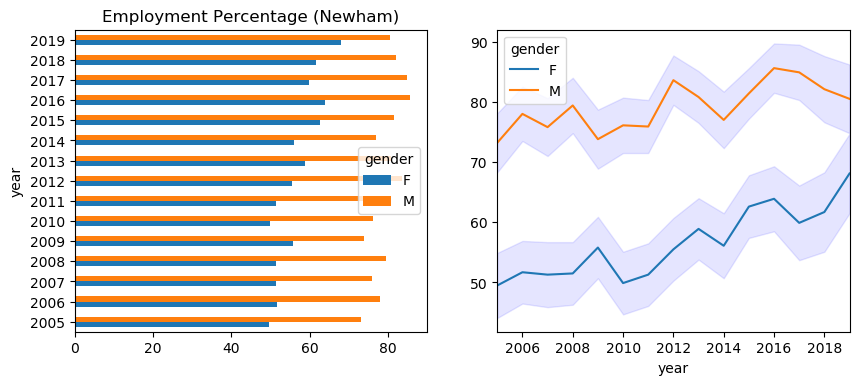

In [57]:
for region in ['Newham']:
# list(set(london.area)):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    df = employ_ratio_london['percent'][region]
    df.plot.barh(ax=axes[0])
    axes[0].set_title('Employment Percentage ({})'.format(region))
    
    df_CI = employ_ratio_london['confidence'][region]
    df.plot(ax=axes[1])
    axes[1].fill_between(df_CI.index, (df['F']-df_CI['F']), (df['F']+df_CI['F']), color='b', alpha=.1)
    axes[1].fill_between(df_CI.index, (df['M']-df_CI['M']), (df['M']+df_CI['M']), color='b', alpha=.1)

In [59]:
# employ_ratio_london['percent'].plot()